In [4]:
import os
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms
from utils.plots import plot_l, plot_model_pred, plot_losses
from utils.models import UNet, save_model, load_model, EncoderDecoderGenerator
from utils.metrics import evaluate_model
from utils.training import train_cnn, load_losses
device = "cuda" if torch.cuda.is_available() else "cpu"
import matplotlib.pyplot as plt
import random

In [5]:
transform = transforms.Compose([
    transforms.Grayscale(), 
    transforms.Resize((256, 256)),
    transforms.ToTensor()          
])

In [6]:
def process_images(input_folder):
    grayscale_images = []
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)

            width, height = img.size
            min_dim = min(width, height)
            left = (width - min_dim) // 2
            top = (height - min_dim) // 2
            right = (width + min_dim) // 2
            bottom = (height + min_dim) // 2
            img_cropped = img.crop((left, top, right, bottom))           

            img_gray = transform(img_cropped)
            grayscale_images.append(img_gray)
            print(f"Processed {image_path} and converted to grayscale")
    return grayscale_images

def plot_pred(image, model, device, rot = 0, save = False, suf = 0):
    output_dir = "/home/default/image-colorization/outputs/"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    if rot == 0:
        plot_l(image)
        if save:
            plt.savefig(os.path.join(output_dir, f"plot_l_{suf}.png"))
        else:
            plt.show()
        plt.close()

        plot_model_pred(image, model, device)
        if save:
            plt.savefig(os.path.join(output_dir, f"plot_model_pred_{suf}.png"))
        else:
            plt.show()
        plt.close()
    if rot == 90:
        plot_l(torch.rot90(image, k=1, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=1, dims=(1, 2)), model, device)
    if rot == -90:
        plot_l(torch.rot90(image, k=-1, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=-1, dims=(1, 2)), model, device)
    if rot == 180:
        plot_l(torch.rot90(image, k=2, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=2, dims=(1, 2)), model, device)

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed
set_seed(1)

In [8]:
input_folder = 'test_images'

grayscale_images_list = process_images(input_folder)

model = load_model(UNet(), "models/unet_l1smooth_trained.pth").to(device)

Processed test_images\20240307_141445.jpg and converted to grayscale
Processed test_images\20240417_083247.jpg and converted to grayscale
Processed test_images\bocconi.jpeg and converted to grayscale
Processed test_images\cake_bw.png and converted to grayscale
Processed test_images\cake_l1smooth_cnn.png and converted to grayscale
Processed test_images\cake_l1smooth_unet.png and converted to grayscale
Processed test_images\CamScanner 05-26-2024 15.01_1.jpg and converted to grayscale
Processed test_images\CamScanner 05-26-2024 15.01_2.jpg and converted to grayscale
Processed test_images\CamScanner 05-26-2024 15.01_3.jpg and converted to grayscale
Processed test_images\CamScanner 05-26-2024 15.01_4.jpg and converted to grayscale
Processed test_images\CamScanner 05-26-2024 15.01_5.jpg and converted to grayscale
Processed test_images\CamScanner 05-26-2024 15.01_6.jpg and converted to grayscale
Processed test_images\CamScanner 05-26-2024 15.01_8.jpg and converted to grayscale
Processed test_

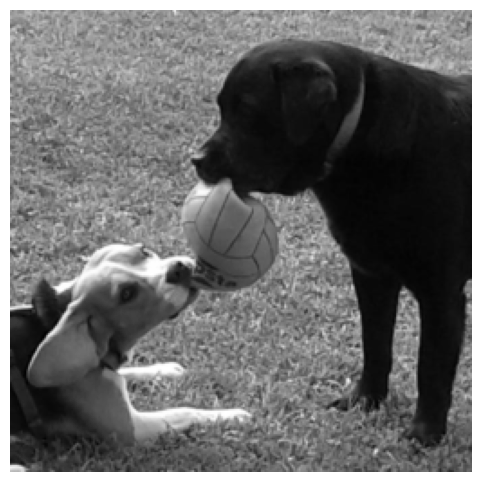

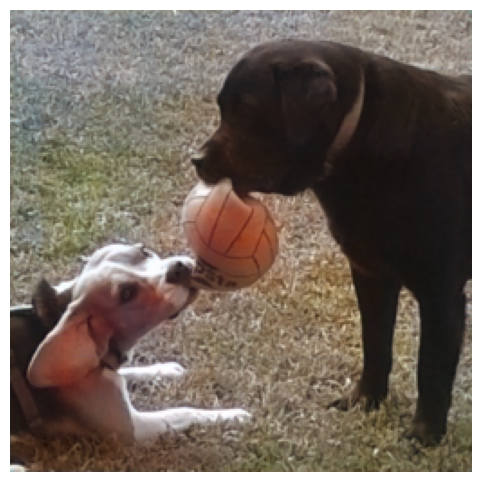

In [73]:
plot_pred(grayscale_images_list[3], model, device, save = True, suf = 0)

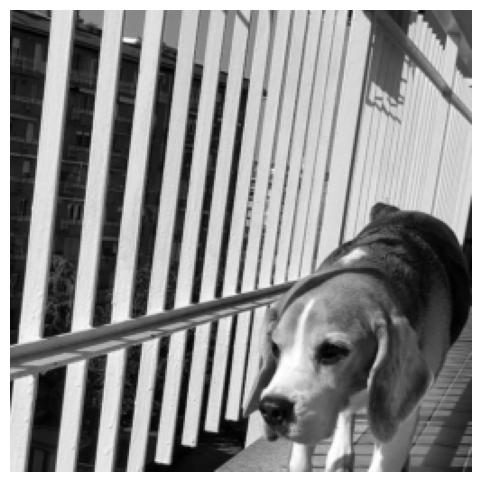

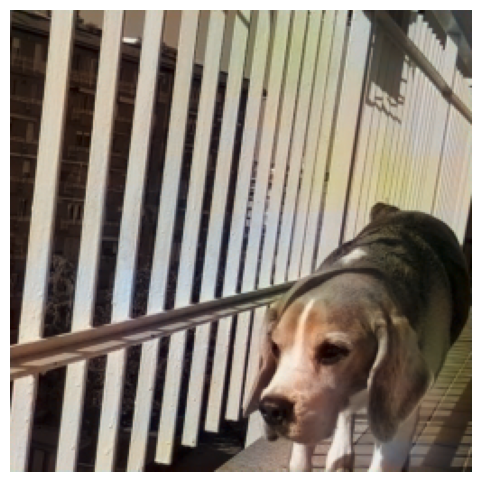

In [68]:
plot_pred(grayscale_images_list[-1], model, device, save = True, suf = 1)

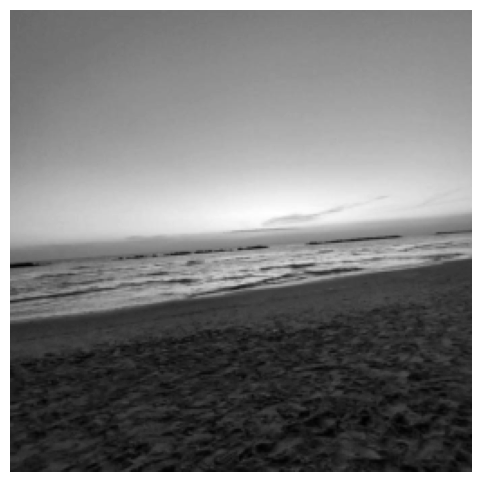

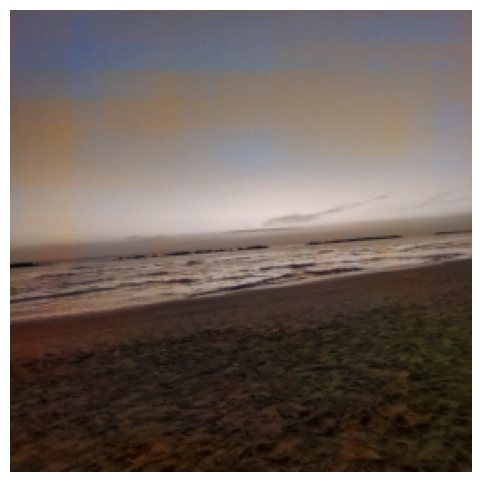

In [69]:
plot_pred(grayscale_images_list[0], model, device, save=True, suf = 2)

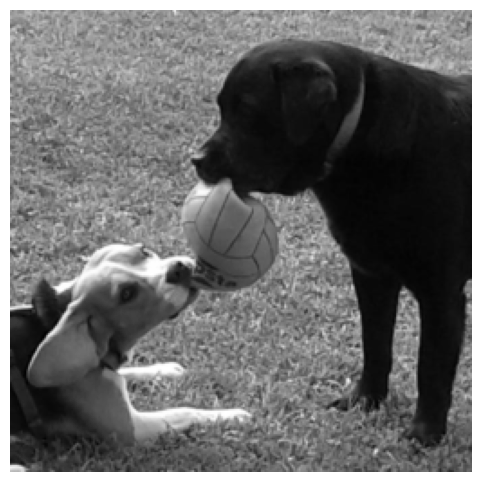

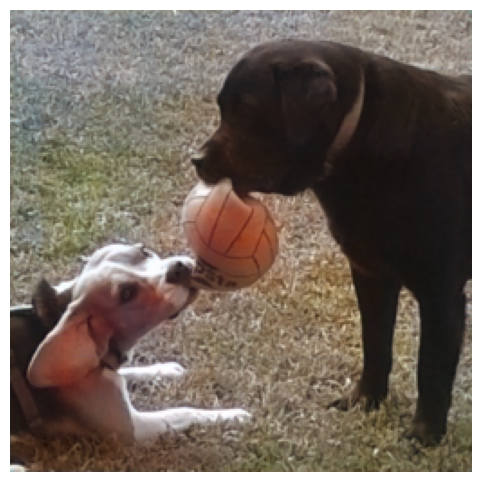

In [70]:
plot_pred(grayscale_images_list[3], model, device, save = True, suf = 3)

In [10]:
model = load_model(EncoderDecoderGenerator(), "models/localgen0.pth").to(device)
model2 = load_model(EncoderDecoderGenerator(), "models/localgen1.pth").to(device)

EncoderDecoderGenerator model loaded successfully!
EncoderDecoderGenerator model loaded successfully!


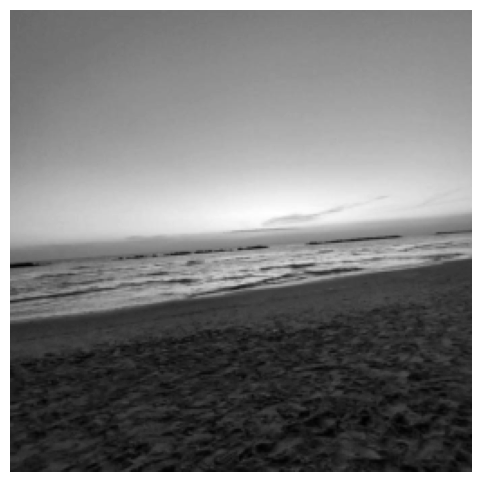

c:\Users\sandr\Desktop\ML\project\image-colorization\utils\plots.py:129: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 18 negative Z values that have been clipped to zero
  rgb_image = lab2rgb(lab_image_reconstructed)


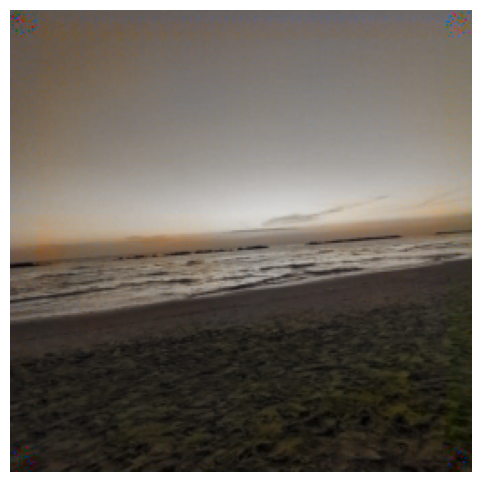

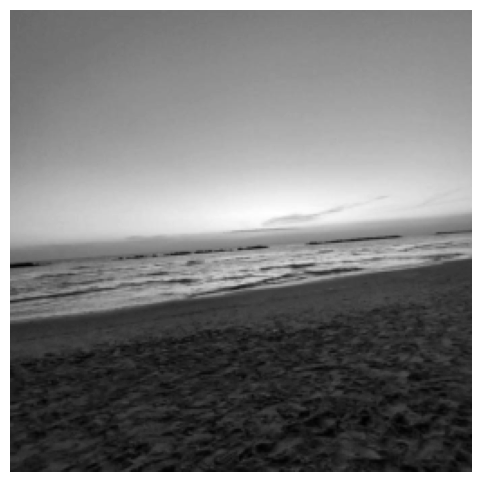

c:\Users\sandr\Desktop\ML\project\image-colorization\utils\plots.py:129: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 3 negative Z values that have been clipped to zero
  rgb_image = lab2rgb(lab_image_reconstructed)


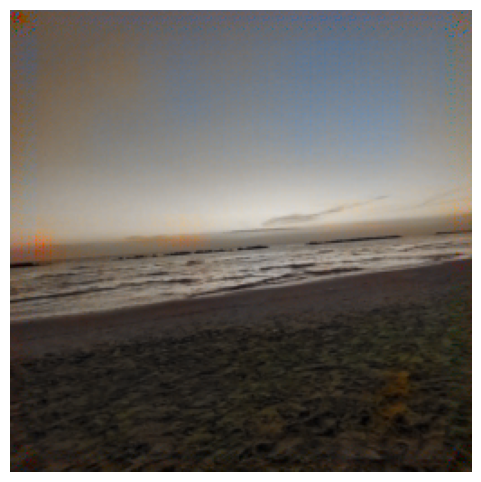

In [15]:
plot_pred(grayscale_images_list[-7], model, device, save = True, suf = 4)
plot_pred(grayscale_images_list[-7], model2, device, save = True, suf = 4)

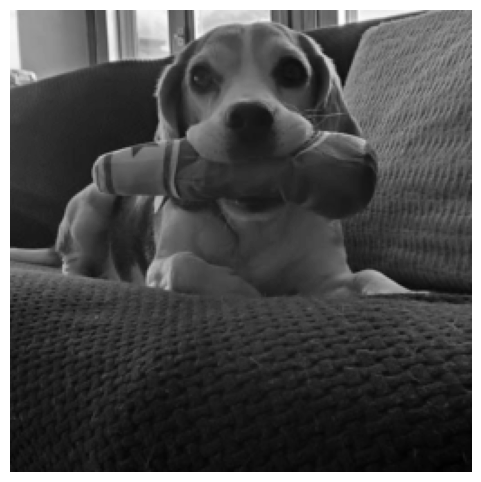

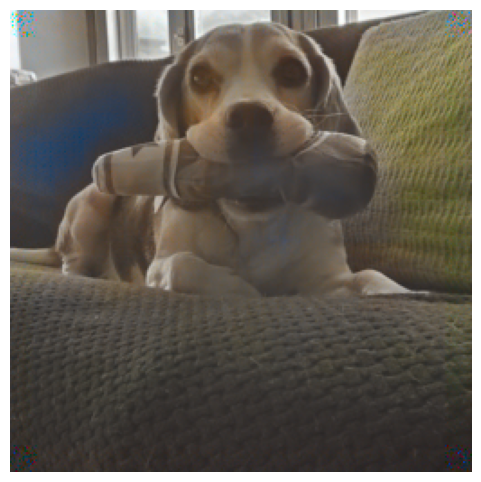

In [39]:
plot_pred(grayscale_images_list[1], model, device, save=True, suf = 5)

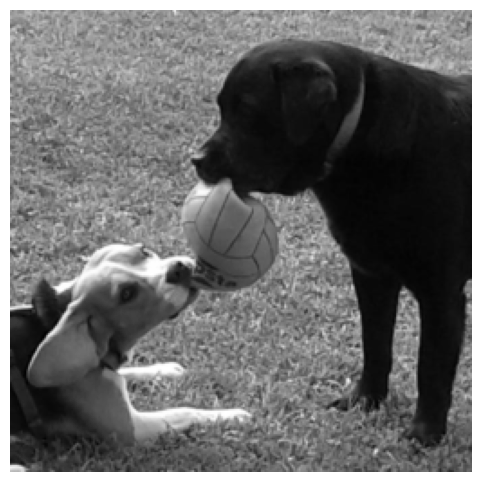

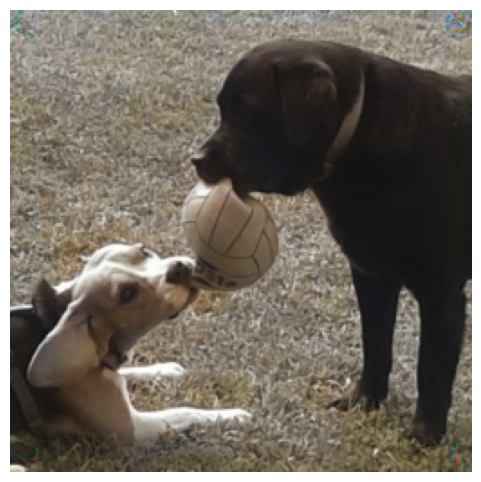

In [40]:
plot_pred(grayscale_images_list[3], model, device, save = True, suf = 6)

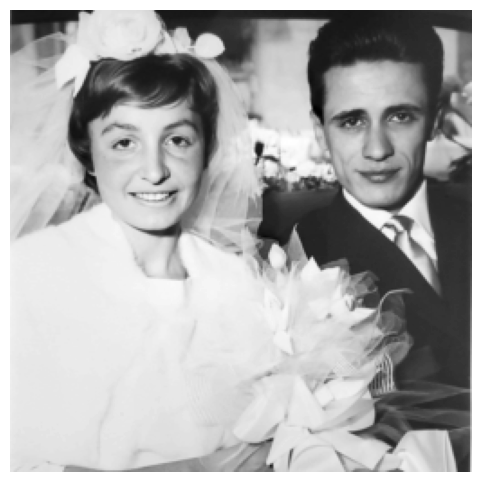

c:\Users\sandr\Desktop\ML\project\image-colorization\utils\plots.py:129: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 16 negative Z values that have been clipped to zero
  rgb_image = lab2rgb(lab_image_reconstructed)


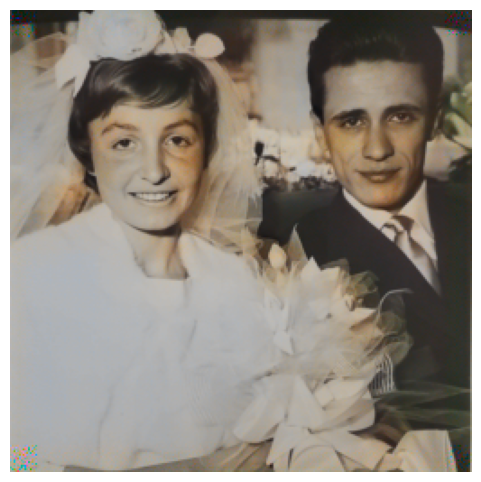

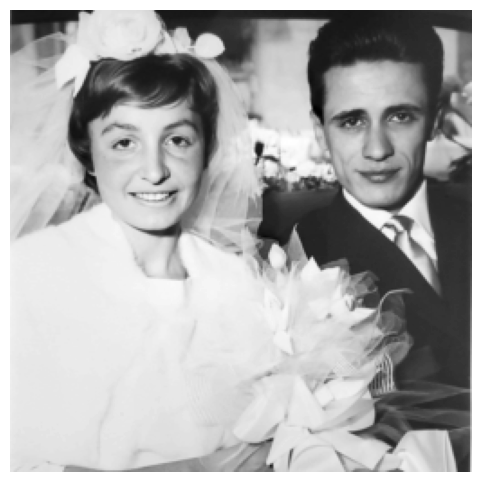

c:\Users\sandr\Desktop\ML\project\image-colorization\utils\plots.py:129: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 6 negative Z values that have been clipped to zero
  rgb_image = lab2rgb(lab_image_reconstructed)


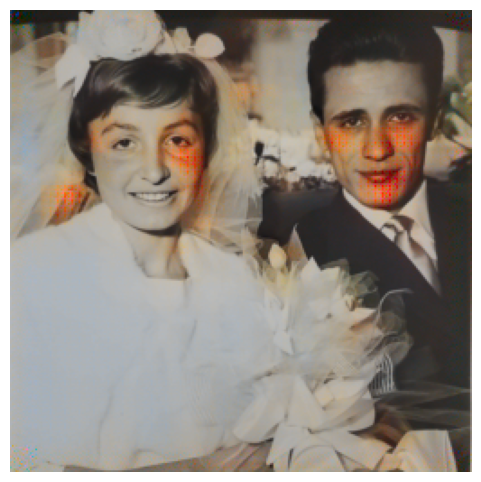

In [12]:
plot_pred(grayscale_images_list[14], model, device, save= True, suf = 7)
plot_pred(grayscale_images_list[14], model2, device, save= True, suf = 7)

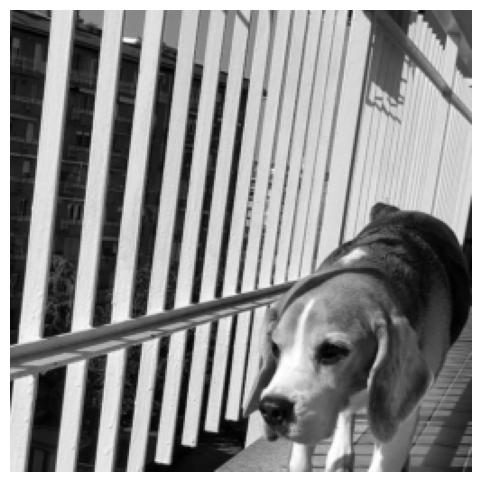

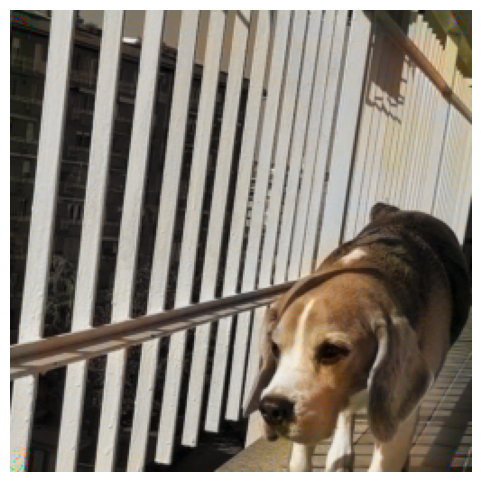

In [42]:
plot_pred(grayscale_images_list[14], model, device, save = True, suf = 8)